In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_parquet("yellow_t_2018-01.parquet", engine="pyarrow")

In [3]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760682,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95,NaN,NaN
8760683,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,NaN,NaN
8760684,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80,NaN,NaN
8760685,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN,NaN


In [4]:
df.shape

(8760687, 19)

In [5]:
def get_missings(df,plot=True,rotation=45,figsize=(10,5), * kwargs):
    labels,values,percent = list(),list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isna().sum():
                labels.append(column)
                values.append(df[column].isna().sum())
                percent.append((df[column].isna().sum() / df.shape[0]) * 100)
        #Make a dataframe 
        missings=pd.DataFrame({'Colúmnas':labels,'Valores faltantes':values,'PorcentajePerdido':percent}).sort_values(by='PorcentajePerdido',ascending=False)
        

        if plot:
            plt.figure(figsize=figsize)
            plot = sns.barplot(x=missings.Colúmnas,y=round(missings.PorcentajePerdido, 2), palette = "Blues_r")# .set_title('Porcentaje de valores perdidos',size=22)
            for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=rotation,size=16)
            plt.xlabel('Colúmnas',size=18)
            plt.ylabel('Porcentaje',size=18)
            plot.set_title('Porcentaje de valores perdidos',size=18)

        return missings
    else:
        return False

,Colúmnas,Valores faltantes,PorcentajePerdido
0,congestion_surcharge,8760675,99.999863
1,airport_fee,8760675,99.999863


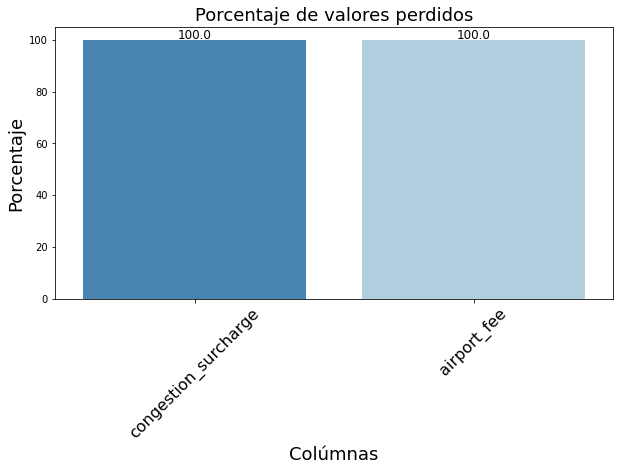

In [6]:
get_missings(df)

In [7]:
a = df.shape[0] - df.airport_fee.isnull().sum()
a

12

In [8]:
b = df.shape[0]-df.congestion_surcharge.isnull().sum()
b

12

In [9]:
df.airport_fee.isnull().sum()

8760675

Eliminamos las columnas que consideramos insignificantes

In [10]:
df.drop(columns=["congestion_surcharge","airport_fee"], inplace=True)

Dividir df

In [11]:
df.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.0,0.0,0.3,5.8


In [12]:
df["dayofmonth"] = df['tpep_pickup_datetime'].apply(pd.to_datetime).dt.day
mask = df.dayofmonth % 3 == 0
df_Impar =df[mask]


In [13]:
df_Impar

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dayofmonth
457861,2,2018-01-03 15:01:11,2018-01-03 15:59:38,1,17.97,2,N,132,186,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,3
468217,2,2018-01-03 16:07:33,2018-01-03 16:21:17,1,2.26,1,N,186,211,2,11.0,0.5,0.5,0.00,0.00,0.3,12.30,3
468218,2,2018-01-03 16:36:07,2018-01-03 16:41:11,1,0.68,1,N,234,249,1,5.0,0.5,0.5,0.94,0.00,0.3,7.24,3
468219,2,2018-01-03 16:44:26,2018-01-03 17:06:03,1,3.78,1,N,249,142,2,16.0,0.5,0.5,0.00,0.00,0.3,17.30,3
468866,2,2018-01-03 00:00:18,2018-01-03 00:29:40,1,22.22,1,N,132,241,1,58.0,0.5,0.5,13.01,5.76,0.3,78.07,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8712835,2,2018-01-30 21:19:18,2018-01-30 21:31:36,1,0.00,1,N,193,193,2,5.0,0.5,0.5,0.00,0.00,0.3,6.30,30
8749506,2,2018-01-30 23:57:30,2018-01-31 00:20:25,1,10.99,1,N,162,208,1,32.5,0.5,0.5,6.76,0.00,0.3,40.56,30
8752510,2,2018-01-30 23:46:37,2018-01-31 00:15:56,1,18.57,2,N,132,236,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,30
8760023,2,2018-01-30 22:58:58,2018-01-30 23:14:54,1,5.63,1,N,87,50,1,18.5,0.5,0.5,1.98,0.00,0.3,21.78,30


In [14]:
df2 = df.head(10)

In [15]:
df2['tpep_pickup_datetime'].apply(pd.to_datetime).dt.day[9]


1

In [16]:
#data_parcial = data_top_9[data_top_9["Date"] >= '2021-07-01 00:00:00']
data_parcial = df[df["tpep_pickup_datetime"] <= '2018-01-04 00:00:00']
data_parcial = data_parcial[data_parcial["tpep_pickup_datetime"] >= '2018-01-03 23:00:00']

In [17]:
data_parcial.index[[1]]

Int64Index([722390], dtype='int64')

In [18]:
data_parcial.reset_index(inplace=True)

In [19]:
data_parcial.head(5)

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dayofmonth
0,722237,2,2018-01-03 23:03:00,2018-01-03 23:13:02,3,1.19,1,N,186,161,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,3
1,722390,2,2018-01-03 23:01:55,2018-01-03 23:09:39,1,1.13,1,N,234,186,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38,3
2,722753,2,2018-01-03 23:00:46,2018-01-03 23:07:39,2,1.05,1,N,230,163,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,3
3,723066,2,2018-01-03 23:02:08,2018-01-03 23:04:55,1,1.15,1,N,140,262,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,3
4,723137,2,2018-01-03 23:00:55,2018-01-03 23:22:04,1,2.99,1,N,113,48,1,15.5,0.5,0.5,1.50,0.0,0.3,18.30,3


In [20]:
data_parcial.tail(5)

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dayofmonth
8379,747843,2,2018-01-03 23:57:07,2018-01-04 00:00:29,1,0.65,1,N,186,68,1,4.5,0.5,0.5,0.08,0.0,0.3,5.88,3
8380,749986,2,2018-01-03 23:17:31,2018-01-03 23:20:56,1,0.62,1,N,211,114,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,3
8381,749987,2,2018-01-03 23:26:01,2018-01-04 22:41:13,3,4.73,1,N,144,61,2,16.0,0.5,0.5,0.00,0.0,0.3,17.30,3
8382,752203,2,2018-01-03 23:04:11,2018-01-03 23:16:49,2,3.36,1,N,97,89,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,3
8383,862436,2,2018-01-03 23:52:49,2018-01-04 00:13:28,1,6.02,1,N,261,255,1,21.0,0.5,0.5,4.46,0.0,0.3,26.76,3


In [21]:
#data_parcial['tpep_pickup_datetime'].apply(pd.to_datetime).dt.day[722237] 

In [22]:
data_parcial["dayofmonth"] = data_parcial['tpep_pickup_datetime'].apply(pd.to_datetime).dt.day
datafiltrada= data_parcial.head(0)



In [23]:
datafiltrada

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dayofmonth


In [24]:
#data_parcial.loc[data_parcial.index == 148 ]

In [25]:
#data_parcial['tpep_pickup_datetime'].apply(pd.to_datetime).dt.day[0]

In [26]:
data_parcial.head(2)

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dayofmonth
0,722237,2,2018-01-03 23:03:00,2018-01-03 23:13:02,3,1.19,1,N,186,161,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,3
1,722390,2,2018-01-03 23:01:55,2018-01-03 23:09:39,1,1.13,1,N,234,186,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38,3


In [27]:
#data_parcial= df.head(10)
data_parcial['tpep_pickup_datetime'].apply(pd.to_datetime).dt.day[1]

3

In [28]:
data_parcial

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dayofmonth
0,722237,2,2018-01-03 23:03:00,2018-01-03 23:13:02,3,1.19,1,N,186,161,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,3
1,722390,2,2018-01-03 23:01:55,2018-01-03 23:09:39,1,1.13,1,N,234,186,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38,3
2,722753,2,2018-01-03 23:00:46,2018-01-03 23:07:39,2,1.05,1,N,230,163,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80,3
3,723066,2,2018-01-03 23:02:08,2018-01-03 23:04:55,1,1.15,1,N,140,262,2,5.0,0.5,0.5,0.00,0.0,0.3,6.30,3
4,723137,2,2018-01-03 23:00:55,2018-01-03 23:22:04,1,2.99,1,N,113,48,1,15.5,0.5,0.5,1.50,0.0,0.3,18.30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,747843,2,2018-01-03 23:57:07,2018-01-04 00:00:29,1,0.65,1,N,186,68,1,4.5,0.5,0.5,0.08,0.0,0.3,5.88,3
8380,749986,2,2018-01-03 23:17:31,2018-01-03 23:20:56,1,0.62,1,N,211,114,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,3
8381,749987,2,2018-01-03 23:26:01,2018-01-04 22:41:13,3,4.73,1,N,144,61,2,16.0,0.5,0.5,0.00,0.0,0.3,17.30,3
8382,752203,2,2018-01-03 23:04:11,2018-01-03 23:16:49,2,3.36,1,N,97,89,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,3


In [29]:
data_parcial.dayofmonth[1]

3

In [30]:
df.loc[df['PassengerId'] == 148 ]

KeyError: 'PassengerId'

In [ ]:
mask = df.dayofmonth % 3 == 0

In [ ]:
dataFiltrada = data_parcial[mask]

In [ ]:
dataFiltrada.shape

(8383, 19)

In [ ]:
pd.DataFrame([data_parcial.iloc[1]])

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dayofmonth
1,722390,2,2018-01-03 23:01:55,2018-01-03 23:09:39,1,1.13,1,N,234,186,1,7.0,0.5,0.5,2.08,0.0,0.3,10.38,3


In [ ]:
datafiltrada = data_parcial.drop(data_parcial.iloc[2], axis = 0)

KeyError: "[722753, Timestamp('2018-01-03 23:00:46'), Timestamp('2018-01-03 23:07:39'), 1.05, 'N', 6.5, 0.5, 0.5, 0.3, 7.8] not found in axis"

In [ ]:
datafiltrada = pd.concat(pd.DataFrame([data_parcial.iloc[6]]))

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [ ]:
datafiltrada

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dayofmonth
6,723505,2,2018-01-03 23:00:08,2018-01-03 23:07:23,1,1.73,1,N,141,163,1,8.0,0.5,0.5,1.5,0.0,0.3,10.8,3


In [ ]:
for i in range(0,data_parcial.shape[0]-1):  
  if data_parcial.dayofmonth[i] % 3 != 0:
    #data_parcial.drop(data_parcial.index[i], axis = 0, inplace=True)
    datafiltrada=pd.concat(data_parcial.iloc[i])


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [ ]:
for i in range(0,data_parcial.shape[0]-1):  
  if data_parcial['tpep_pickup_datetime'].apply(pd.to_datetime).dt.day[i+1] % 3 != 0:
    #data_parcial.drop(data_parcial.index[i], axis = 0, inplace=True)
    datafiltrada = datafiltrada.concat(pd.DataFrame([data_parcial.iloc[i]]))


KeyboardInterrupt: 

In [ ]:
#datafiltrada.append(data_parcial.loc[data_parcial.index == 1])

In [ ]:
datafiltrada

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8313,744788,2,2018-01-03 23:59:39,2018-01-04 00:16:01,2,3.0,1,N,113,163,1,13.0,0.5,0.5,2.86,0.0,0.3,17.16


In [ ]:
df2.apply(
    lambda row: if df2['tpep_pickup_datetime'].apply(pd.to_datetime).dt.day[0] , axis=1).fillna(0)

SyntaxError: invalid syntax (3523998058.py, line 2)

In [ ]:
df.

SyntaxError: invalid syntax (791285630.py, line 1)